# Final Project

- By Sonya Kapur, Aashman Rastogi and Lindsey Fujimori

# Group Statement

All three of us wrote the data acquisition and preparation. Aashman led Figure 2, Table 1-2, and the logistic regression model. Lindsey led Figure 1 and the Random Forest model. Sonya led Figure 3 and the support vector machine model. We all wrote the explanation of our own figures and the explanation of our own models, and the conclusion. We all checked each other’s work and made revisions to code and writing.

### Importing relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import svm

### Reading in Data

In [2]:
url = 'https://philchodrow.github.io/PIC16A/datasets/palmer_penguins.csv'
penguins = pd.read_csv(url)
penguins

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN


### Using only relevant columns

In [3]:
cols=["Species","Sex","Island","Culmen Length (mm)","Flipper Length (mm)","Culmen Depth (mm)","Body Mass (g)"]
penguins = penguins[cols]
penguins

,Species,Sex,Island,Culmen Length (mm),Flipper Length (mm),Culmen Depth (mm),Body Mass (g)
0,Adelie Penguin (Pygoscelis adeliae),MALE,Torgersen,39.1,181.0,18.7,3750.0
1,Adelie Penguin (Pygoscelis adeliae),FEMALE,Torgersen,39.5,186.0,17.4,3800.0
2,Adelie Penguin (Pygoscelis adeliae),FEMALE,Torgersen,40.3,195.0,18.0,3250.0
3,Adelie Penguin (Pygoscelis adeliae),NaN,Torgersen,NaN,NaN,NaN,NaN
4,Adelie Penguin (Pygoscelis adeliae),FEMALE,Torgersen,36.7,193.0,19.3,3450.0
...,...,...,...,...,...,...,...
339,Gentoo penguin (Pygoscelis papua),NaN,Biscoe,NaN,NaN,NaN,NaN
340,Gentoo penguin (Pygoscelis papua),FEMALE,Biscoe,46.8,215.0,14.3,4850.0
341,Gentoo penguin (Pygoscelis papua),MALE,Biscoe,50.4,222.0,15.7,5750.0
342,Gentoo penguin (Pygoscelis papua),FEMALE,Biscoe,45.2,212.0,14.8,5200.0


# Data Importing/Cleaning


 - Checking for any odd values in textual columns to clean in the future

In [4]:
print(set(penguins["Sex"]))
print(set(penguins["Species"]))
print(set(penguins["Island"]))

{nan, 'FEMALE', '.', 'MALE'}
{'Chinstrap penguin (Pygoscelis antarctica)', 'Adelie Penguin (Pygoscelis adeliae)', 'Gentoo penguin (Pygoscelis papua)'}
{'Torgersen', 'Dream', 'Biscoe'}


#### - Splitting data into 20% test and 80% train

In [5]:
np.random.seed(1234)

train,test = train_test_split(penguins,test_size = 0.2)
train.shape,test.shape

((275, 7), (69, 7))

In [6]:
train

,Species,Sex,Island,Culmen Length (mm),Flipper Length (mm),Culmen Depth (mm),Body Mass (g)
323,Gentoo penguin (Pygoscelis papua),MALE,Biscoe,49.1,228.0,15.0,5500.0
149,Adelie Penguin (Pygoscelis adeliae),MALE,Dream,37.8,193.0,18.1,3750.0
288,Gentoo penguin (Pygoscelis papua),FEMALE,Biscoe,43.5,220.0,14.2,4700.0
146,Adelie Penguin (Pygoscelis adeliae),MALE,Dream,39.2,190.0,18.6,4250.0
227,Gentoo penguin (Pygoscelis papua),MALE,Biscoe,46.7,219.0,15.3,5200.0
...,...,...,...,...,...,...,...
204,Chinstrap penguin (Pygoscelis antarctica),FEMALE,Dream,45.7,193.0,17.3,3600.0
53,Adelie Penguin (Pygoscelis adeliae),MALE,Biscoe,42.0,200.0,19.5,4050.0
294,Gentoo penguin (Pygoscelis papua),FEMALE,Biscoe,46.4,216.0,15.0,4700.0
211,Chinstrap penguin (Pygoscelis antarctica),FEMALE,Dream,45.6,194.0,19.4,3525.0


In [7]:
test

,Species,Sex,Island,Culmen Length (mm),Flipper Length (mm),Culmen Depth (mm),Body Mass (g)
64,Adelie Penguin (Pygoscelis adeliae),FEMALE,Biscoe,36.4,184.0,17.1,2850.0
237,Gentoo penguin (Pygoscelis papua),MALE,Biscoe,49.2,221.0,15.2,6300.0
115,Adelie Penguin (Pygoscelis adeliae),MALE,Biscoe,42.7,196.0,18.3,4075.0
97,Adelie Penguin (Pygoscelis adeliae),MALE,Dream,40.3,196.0,18.5,4350.0
37,Adelie Penguin (Pygoscelis adeliae),FEMALE,Dream,42.2,180.0,18.5,3550.0
...,...,...,...,...,...,...,...
224,Gentoo penguin (Pygoscelis papua),MALE,Biscoe,47.6,215.0,14.5,5400.0
167,Chinstrap penguin (Pygoscelis antarctica),MALE,Dream,50.5,201.0,19.6,4050.0
296,Gentoo penguin (Pygoscelis papua),FEMALE,Biscoe,47.5,209.0,14.2,4600.0
40,Adelie Penguin (Pygoscelis adeliae),FEMALE,Dream,36.5,182.0,18.0,3150.0


#### - Data Cleaning

In [8]:
def prep_data(data):
    
    """
    Purpose: transforms the data by cleaning and converting categorical variables to quantitative, trains data
    Input: data - the dataset
    Output: x - the trained x values
            y - the trained y values
    """
    
    df = data.copy()
    df = df.dropna()                        # dropping Nan values
    df = df.loc[df["Sex"] != "."]           # Removing non male and female values
    le = preprocessing.LabelEncoder()
    df["Sex"] = le.fit_transform(df["Sex"])
    df["Island"] = le.fit_transform(df["Island"])
    df["Species"] = le.fit_transform(df["Species"])
    
    x = df.drop(["Species"],axis = 1)        # Predictor Variables
    y = df["Species"]                        # Target Variable 
    return x,y

x_train,y_train = prep_data(train)

In [9]:
print("Adelie Penguin (Pygoscelis adeliae)      : 0")
print("Chinstrap penguin (Pygoscelis antarctica): 1")
print("Gentoo penguin (Pygoscelis papua)        : 2 ")

Adelie Penguin (Pygoscelis adeliae)      : 0
Chinstrap penguin (Pygoscelis antarctica): 1
Gentoo penguin (Pygoscelis papua)        : 2 


# Exploratory Analysis

#### We analyze the data using tables, barplots, scatterplot and boxplot

In [10]:
penguins = penguins.dropna()
penguins = penguins.loc[penguins["Sex"] != "."]

### -  Tables

In [11]:
table = penguins.groupby(["Island","Species","Sex"]).aggregate([len,np.mean])
table

Culmen Length (mm)  \
                                                                          len   
Island    Species                                   Sex                         
Biscoe    Adelie Penguin (Pygoscelis adeliae)       FEMALE                 22   
                                                    MALE                   22   
          Gentoo penguin (Pygoscelis papua)         FEMALE                 58   
                                                    MALE                   61   
Dream     Adelie Penguin (Pygoscelis adeliae)       FEMALE                 27   
                                                    MALE                   28   
          Chinstrap penguin (Pygoscelis antarctica) FEMALE                 34   
                                                    MALE                   34   
Torgersen Adelie Penguin (Pygoscelis adeliae)       FEMALE                 24   
                                                    MALE                   23   

                                                                       \
                                                                 mean   
Island    Species                                   Sex                 
Biscoe    Adelie Penguin (Pygoscelis adeliae)       FEMALE  37.359091   
                                                    MALE    40.590909   
          Gentoo penguin (Pygoscelis papua)         FEMALE  45.563793   
                                                    MALE    49.473770   
Dream     Adelie Penguin (Pygoscelis adeliae)       FEMALE  36.911111   
                                                    MALE    40.071429   
          Chinstrap penguin (Pygoscelis antarctica) FEMALE  46.573529   
                                                    MALE    51.094118   
Torgersen Adelie Penguin (Pygoscelis adeliae)       FEMALE  37.554167   
                                                    MALE    40.586957   

                                                           Flipper Length (mm)  \
                                                                           len   
Island    Species                                   Sex                          
Biscoe    Adelie Penguin (Pygoscelis adeliae)       FEMALE                  22   
                                                    MALE                    22   
          Gentoo penguin (Pygoscelis papua)         FEMALE                  58   
                                                    MALE                    61   
Dream     Adelie Penguin (Pygoscelis adeliae)       FEMALE                  27   
                                                    MALE                    28   
          Chinstrap penguin (Pygoscelis antarctica) FEMALE                  34   
                                                    MALE                    34   
Torgersen Adelie Penguin (Pygoscelis adeliae)       FEMALE                  24   
                                                    MALE                    23   

                                                                        \
                                                                  mean   
Island    Species                                   Sex                  
Biscoe    Adelie Penguin (Pygoscelis adeliae)       FEMALE  187.181818   
                                                    MALE    190.409091   
          Gentoo penguin (Pygoscelis papua)         FEMALE  212.706897   
                                                    MALE    221.540984   
Dream     Adelie Penguin (Pygoscelis adeliae)       FEMALE  187.851852   
                                                    MALE    191.928571   
          Chinstrap penguin (Pygoscelis antarctica) FEMALE  191.735294   
                                                    MALE    199.911765   
Torgersen Adelie Penguin (Pygoscelis adeliae)       FEMALE  188.291667   
                                                    MALE    194.913043   

                         

The table above is grouping by island and displaying species by each island so we can examine each quantitative feature.

It also shows the number of penguins for each sex which is represented by length and the mean for each quantitative feature  

In [12]:
table = penguins.groupby(["Species","Island","Sex"]).aggregate([len,np.mean])
table

Culmen Length (mm)  \
                                                                          len   
Species                                   Island    Sex                         
Adelie Penguin (Pygoscelis adeliae)       Biscoe    FEMALE                 22   
                                                    MALE                   22   
                                          Dream     FEMALE                 27   
                                                    MALE                   28   
                                          Torgersen FEMALE                 24   
                                                    MALE                   23   
Chinstrap penguin (Pygoscelis antarctica) Dream     FEMALE                 34   
                                                    MALE                   34   
Gentoo penguin (Pygoscelis papua)         Biscoe    FEMALE                 58   
                                                    MALE                   61   

                                                                       \
                                                                 mean   
Species                                   Island    Sex                 
Adelie Penguin (Pygoscelis adeliae)       Biscoe    FEMALE  37.359091   
                                                    MALE    40.590909   
                                          Dream     FEMALE  36.911111   
                                                    MALE    40.071429   
                                          Torgersen FEMALE  37.554167   
                                                    MALE    40.586957   
Chinstrap penguin (Pygoscelis antarctica) Dream     FEMALE  46.573529   
                                                    MALE    51.094118   
Gentoo penguin (Pygoscelis papua)         Biscoe    FEMALE  45.563793   
                                                    MALE    49.473770   

                                                           Flipper Length (mm)  \
                                                                           len   
Species                                   Island    Sex                          
Adelie Penguin (Pygoscelis adeliae)       Biscoe    FEMALE                  22   
                                                    MALE                    22   
                                          Dream     FEMALE                  27   
                                                    MALE                    28   
                                          Torgersen FEMALE                  24   
                                                    MALE                    23   
Chinstrap penguin (Pygoscelis antarctica) Dream     FEMALE                  34   
                                                    MALE                    34   
Gentoo penguin (Pygoscelis papua)         Biscoe    FEMALE                  58   
                                                    MALE                    61   

                                                                        \
                                                                  mean   
Species                                   Island    Sex                  
Adelie Penguin (Pygoscelis adeliae)       Biscoe    FEMALE  187.181818   
                                                    MALE    190.409091   
                                          Dream     FEMALE  187.851852   
                                                    MALE    191.928571   
                                          Torgersen FEMALE  188.291667   
                                                    MALE    194.913043   
Chinstrap penguin (Pygoscelis antarctica) Dream     FEMALE  191.735294   
                                                    MALE    199.911765   
Gentoo penguin (Pygoscelis papua)         Biscoe    FEMALE  212.706897   
                                                    MALE    221.540984   

                         

The table above is grouping by species and displys the island on which it is found so we can examine each quantitative feature. 

It also shows the number of penguins for each sex which is represented by length and the mean for each quantitative feature  

### -  Barplots

[Text(0.5, 1.0, 'Species vs. Culmen Length (mm)')]

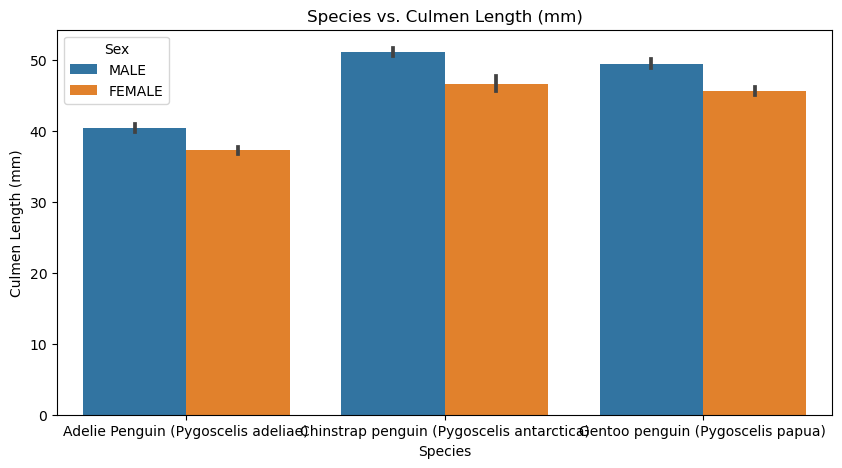

In [13]:
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(data= penguins, x= "Species", y= "Culmen Length (mm)", hue= "Sex").set(title='Species vs. Culmen Length (mm)')


According to the barplot depicting Species vs. Culmen Length (mm), within each respective sex, the Chinstrap penguin has the longest culmen length out of the three species. The Gentoo penguin has the second longest culmen length, and the Adelie penguin has the shortest culmen length.

[Text(0.5, 1.0, 'Species vs. Flipper Length (mm)')]

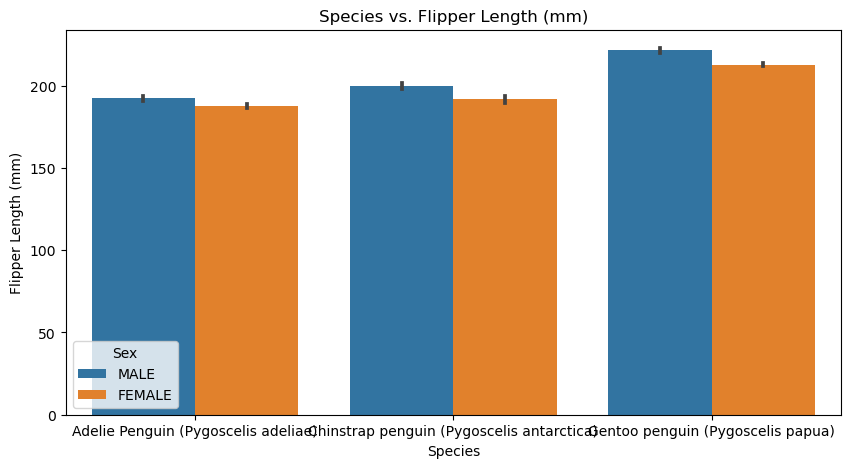

In [14]:
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(data= penguins, x= "Species",
            y= "Flipper Length (mm)", hue= "Sex").set(title='Species vs. Flipper Length (mm)')

According to the barplot depicting Species vs. Flipper Length (mm), within each respective sex, the Gentoo penguin has the largest flipper length of the three species. The Chinstrap penguin has the second largest flipper length and the Adelie penguin has the smallest flipper length.

[Text(0.5, 1.0, 'Species vs. Culmen Depth (mm)')]

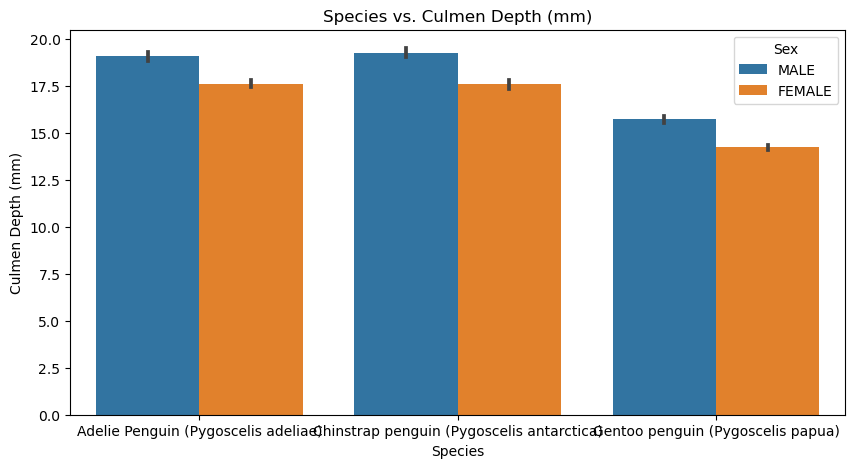

In [15]:
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(data= penguins, x= "Species",
            y= "Culmen Depth (mm)", hue= "Sex").set(title='Species vs. Culmen Depth (mm)')

According to the barplot depicting Species vs. Culmen Depth (mm), within each respective sex, the Chinstrap penguin has the largest of culmen depth of the three species, slightly larger than the Adelie penguin. The Gentoo penguin has the smallest culmen depth.

[Text(0.5, 1.0, 'Species vs. Body Mass (g)')]

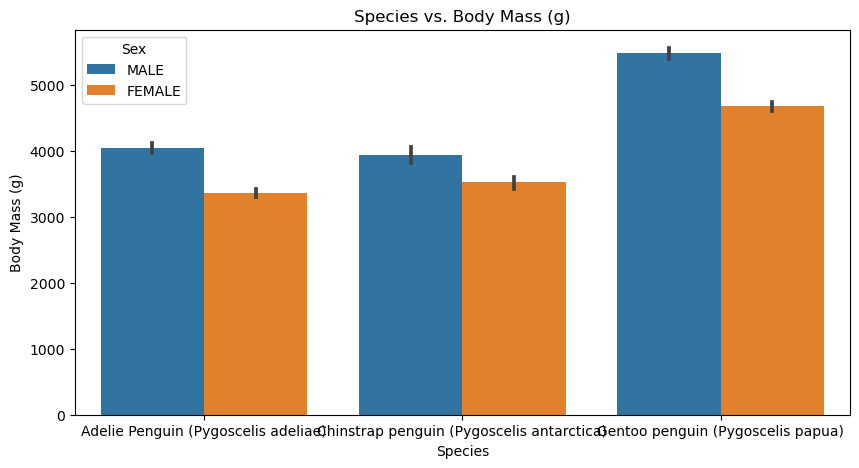

In [16]:
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(data= penguins, x= "Species",
            y= "Body Mass (g)", hue= "Sex").set(title='Species vs. Body Mass (g)')

According to the barplot depicting Species vs. Body Mass (g), for male penguins, the Gentoo penguin has the largest body mass, the Adelie penguin has the second largest body mass and the Chinstrap penguin has the smallest body mass. For female penguins, the Gentoo penguin has the largest body mass, the chinstrap penguin has the second largest body mass and the Adelie penguin has the smallest body mass. Out of the four quantitative data set categories, this is the only instance where the rankings from largest to smallest differ between sexes.

### -  Scatter Plot

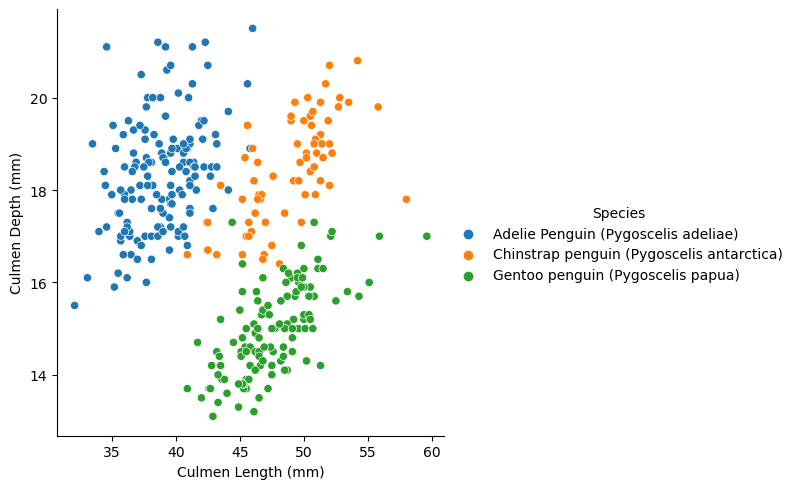

In [17]:
sns.relplot(x = "Culmen Length (mm)", y = "Culmen Depth (mm)", hue = "Species", data = penguins)

Scatter plots were used to show the relationship between Culmen Length (mm) and Culmen Depth (mm).

In the scatterplot above, by separating the penguin species into different colors, it is notable that there is a clear distinction in the relationship between Culmen Length (mm) and Culmen Depth (mm) for each separate species. The clear contrast in culmen length and culmen depth between species shows us that we could potentially predict and identify the species of a penguin by the length and depth of its culmen.

### -  Box Plot

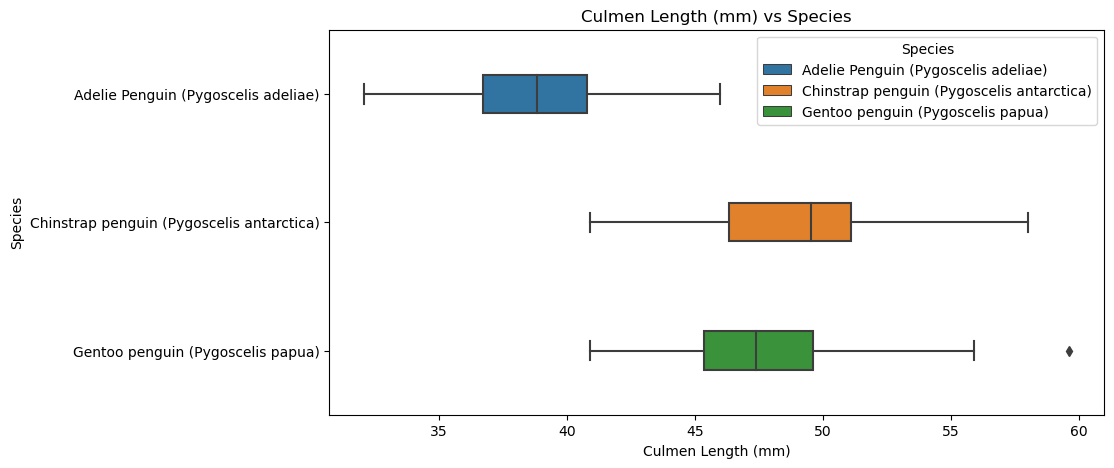

In [18]:
fig,ax = plt.subplots(figsize = (10,5))
g = sns.boxplot(data = penguins, 
            x = "Culmen Length (mm)", 
            y = "Species", 
            hue = "Species", 
            dodge = False, 
            width = 0.3).set(title="Culmen Length (mm) vs Species")
plt.legend(loc = "upper right", title = "Species")

This Box Plot is used to show the relationship between Species and Culmen Length.

In the box plot above, by splitting each species and taking a look at their culmen length, it is notable to see the differences between each species. The Chinstrap penguin and the Gentoo penguin have higher culmen lengths than the Adelie Penguin species. This distinction is notable because the clear contrast in culmen length between species shows us that we could potentially predict and identify the species of a penguin by the length of its culmen.

# Feature Selection

Fuguring out the set of columns consisting of one qualitative and two quantitative parameters to best predict the species

In [19]:
def column_score(col):
    
    """
    Purpose: FInds the score of each individual set of columns to find the best
    Input: col - set of columns
    Output: the scores for each set of columns
    """
    
    print("training with "+str(col))
    
    """
    using max_iter = 5800 to prevent
    'lbfgs failed to converge (status=1):
    STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.' error
    """
    
    LR = LogisticRegression(max_iter = 5800)
    
    return cross_val_score(LR,x_train[col],y_train,cv=5).mean()

In [20]:
cols=[["Sex","Culmen Depth (mm)","Flipper Length (mm)"],
      ["Island","Culmen Depth (mm)","Flipper Length (mm)"],
      ["Sex","Culmen Length (mm)","Flipper Length (mm)"],
      ["Island","Culmen Length (mm)","Flipper Length (mm)"],
      ["Sex","Culmen Depth (mm)","Body Mass (g)"],
      ["Island","Culmen Depth (mm)","Body Mass (g)"],
      ["Sex","Culmen Length (mm)","Body Mass (g)"],
      ["Island","Culmen Length (mm)","Body Mass (g)"],
      ["Sex","Flipper Length (mm)","Body Mass (g)"],
      ["Island","Flipper Length (mm)","Body Mass (g)"],
      ["Sex","Culmen Depth (mm)","Culmen Length (mm)"],
      ["Island","Culmen Depth (mm)","Culmen Length (mm)"]]
      
for col in cols:
    x = column_score(col)
    print("CV score is ", np.round(x,3))

training with ['Sex', 'Culmen Depth (mm)', 'Flipper Length (mm)']
CV score is  0.838
training with ['Island', 'Culmen Depth (mm)', 'Flipper Length (mm)']
CV score is  0.842
training with ['Sex', 'Culmen Length (mm)', 'Flipper Length (mm)']
CV score is  0.97
training with ['Island', 'Culmen Length (mm)', 'Flipper Length (mm)']
CV score is  0.974
training with ['Sex', 'Culmen Depth (mm)', 'Body Mass (g)']
CV score is  0.8
training with ['Island', 'Culmen Depth (mm)', 'Body Mass (g)']
CV score is  0.804
training with ['Sex', 'Culmen Length (mm)', 'Body Mass (g)']
CV score is  0.981
training with ['Island', 'Culmen Length (mm)', 'Body Mass (g)']
CV score is  0.943
training with ['Sex', 'Flipper Length (mm)', 'Body Mass (g)']
CV score is  0.777
training with ['Island', 'Flipper Length (mm)', 'Body Mass (g)']
CV score is  0.747
training with ['Sex', 'Culmen Depth (mm)', 'Culmen Length (mm)']
CV score is  0.989
training with ['Island', 'Culmen Depth (mm)', 'Culmen Length (mm)']
CV score is  0

- As can be seen above, we get the scores for the set of each selected feature for its prediction on the target data
- We need to use one qualitative and two quantitative data sets according to the parameters
  -  Training with ['Sex', 'Culmen Depth (mm)', 'Culmen Length (mm)'], CV score is 0.989 which has the highest accuracy of all given column combinations

# Modelling

**In this next section, for each figure we discuss:**

How y values are predicted:
The y value predict our test set results.
We predict the y value by calling the predict function on our test data

Creating the confusion matrix:
The confusion matrix allows us to evaluate and visualize the performance of each model by showing us which samples were correctly classified.

Lastly, we visualize each model by using decision regions which display each models' performance on the train and test set and discuss the errors that occur.

##### - Setting the required columns for analysis after feature selection 

In [21]:
cols=["Culmen Length (mm)","Culmen Depth (mm)","Sex"]
x_test,y_test = prep_data(test)
x_train = x_train[cols]
x_test = x_test[cols]

## Plot function - used for all visualizations

In [22]:
def plot_region(T,x,y):
    
    """
    Purpose: Use the indicated model to plot decision regions for Culmen length, culmen depth for each 
    species in each sex
    Input: T - model classifier
        x - x training set
        y - y training set
    Output: displays the decision regions
    """
    
    T.fit(x,y)
    
    for i in range(2):
        
        xtemp = x[x["Sex"] == i] # has length 130
        ytemp = y[x["Sex"] == i]
        
        x0 = xtemp["Culmen Length (mm)"]
        x1 = xtemp["Culmen Depth (mm)"]


        grid_x=np.linspace(x0.min(),x0.max(),501)
        grid_y=np.linspace(x1.min(),x1.max(),501)

        xx,yy=np.meshgrid(grid_x,grid_y)

        
        zz = np.ones(xx.shape)*i
        ZZ = zz.ravel()
        XX = xx.ravel()
        YY = yy.ravel()
        p = T.predict(np.c_[XX,YY,ZZ]) # c stands for concatenation

        p = p.reshape(xx.shape)

        fig,ax = plt.subplots(1)
        ax.scatter(x0,x1,c = ytemp,cmap = "jet",alpha = 1)

        #this makes our decision regions
        ax.contourf(xx,yy,p,cmap = "jet",alpha = 0.2)
        D={1:"Male",0:"Female"}
        ax.set(xlabel="Culmen Length (mm)",ylabel="Culmen Depth (mm)",title=f"{D[i]}")

## 1) Using Multinomial Logistic Regression

Using multinomial Logistic Regression to predict the species based on our chosen parameters. We train the model by cross validating it on the training set and then finally make our prediction. 

To visualize our results and the errors we plot decision regions for each sex and display confusion matrix as well. 

In [23]:
LR = LogisticRegression(multi_class = "multinomial", solver = "lbfgs",max_iter=5800)
score = cross_val_score(LR,x_train,y_train,cv=10).mean()
print("Mean accuracy of ",score)

Mean accuracy of  0.9887464387464387


In [24]:
LR.fit(x_train,y_train)

LogisticRegression(max_iter=5800, multi_class='multinomial')

#### predicting y values

In [25]:
y_pred = LR.predict(x_test)

In [26]:
score_pred = LR.score(x_test,y_test)
score_pred

0.9705882352941176

### creating confusion matrix

In [27]:
cm = metrics.confusion_matrix(y_test,y_pred)
cm

array([[31,  1,  0],
       [ 1, 15,  0],
       [ 0,  0, 20]])

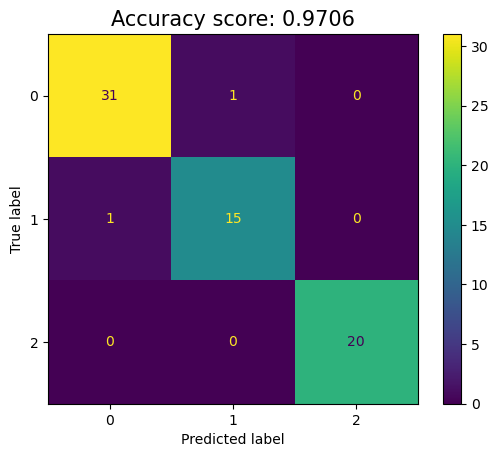

In [28]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.title(f"Accuracy score: {score_pred.round(4)}", size = 15)
plt.show()


The confusion matrix above displays the error the model makes where two penguins are incorrectly predicted
1) Chinstrap was predicted to be Adelie

2) Adelie was predicted to be Chinstrap

In [29]:
print("Adelie Penguin (Pygoscelis adeliae)      : 0")
print("Chinstrap penguin (Pygoscelis antarctica): 1")
print("Gentoo penguin (Pygoscelis papua)        : 2 ")

Adelie Penguin (Pygoscelis adeliae)      : 0
Chinstrap penguin (Pygoscelis antarctica): 1
Gentoo penguin (Pygoscelis papua)        : 2 


### Plotting Decision Regions

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


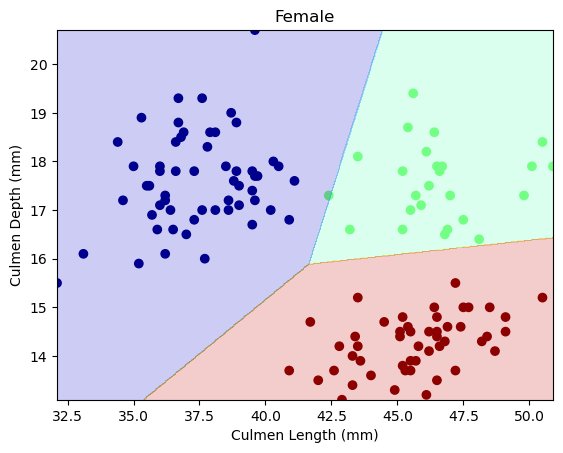

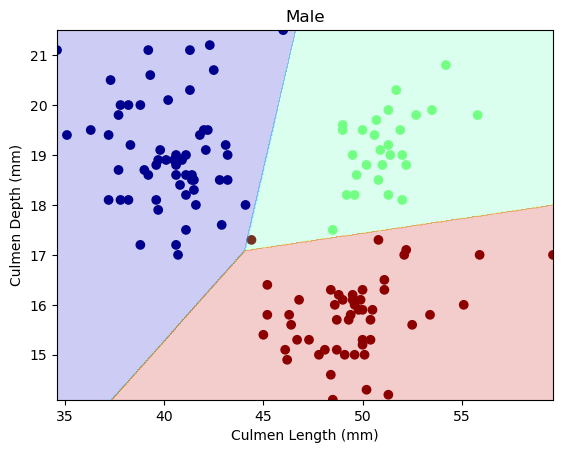

In [30]:
LR = LogisticRegression(multi_class = "multinomial", solver = "lbfgs",max_iter=5800)
plot_region(LR,x_train,y_train)

###  Error and Analysis

The reson why there are 2 inaccurate prediction can be due to outlier values or due to the fact that our sample size in too small to make a more accurate prediction. It is also a linear model and does not lead to continous outcomes, therefore non-linear problems cannot be efficiently soved where rare cases may be encountered.

## 2) Random Forest

We use the random forest model to predict the species by using the algorithm which creates multiple decision trees which are then merged together for a more accurate prediction. We train the model by cross validating it on the training set and then finally make our prediction. 

To visualize our results and the errors, we plot decision regions for each sex and display a confusion matrix. 

In [31]:
forest = RandomForestClassifier(criterion='gini',
                                 n_estimators=7,
                                 random_state=1,
                                 n_jobs=2)
#creating a random forest with 7 decision trees

forest.fit(x_train, y_train)
# .fit takes the training data as arguments and fits the model with the training instances

RandomForestClassifier(n_estimators=7, n_jobs=2, random_state=1)

In [32]:
score = cross_val_score(forest,x_train,y_train,cv=10).mean()
print("Mean accuracy of cross-validation score:",score)

Mean accuracy of cross-validation score: 0.9810541310541311


### Predicting y values

In [33]:
y_pred = forest.predict(x_test)
score_pred = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % score_pred)

Accuracy: 0.985294


### Creating Confusion Matrix

In [34]:
cm = metrics.confusion_matrix(y_test,y_pred)
cm

array([[32,  0,  0],
       [ 1, 15,  0],
       [ 0,  0, 20]])

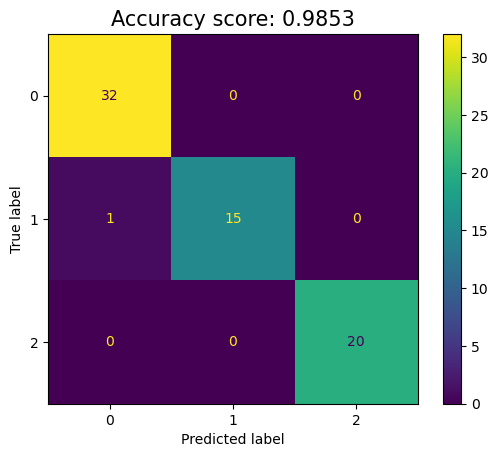

In [35]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.title(f"Accuracy score: {score_pred.round(4)}", size = 15)
plt.show()

The confusion matrix above displays the error the model makes where one penguin is incorrectly predicted to be Adelie, and they are actually Chinstrap. 

## Plotting decision region

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


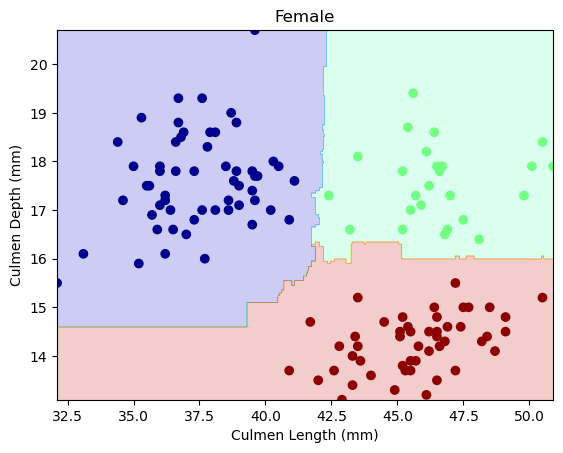

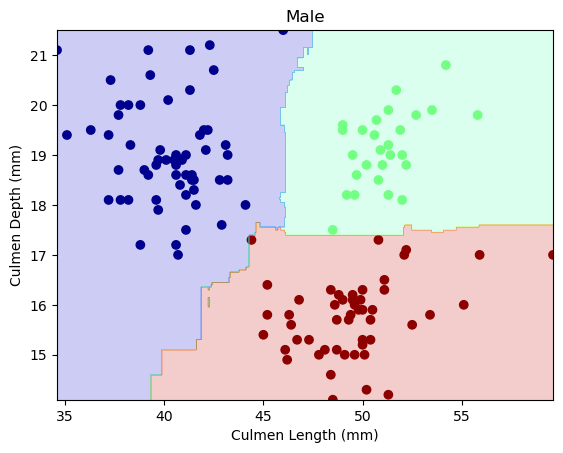

In [36]:
RF=RandomForestClassifier()

plot_region(RF,x_train,y_train)

### Error and Analysis

Although the model does not appear to fail on the training or test set, appears that the boundaries of the desicion regions are complex which could be a sign of slight overfitting. This is especially notable on the test set, where the boundaries become increasingly complex. This is contrastive with the decision regions created for our other two models, multinomial logistic regression and support vector machines, where the decision regions appear to be cleaner.

## 3) Support Vector Machines

We use the Support Vector Machine model to predict the species by using the algorithm that maps the data to a high-dimensional feature space so the data is categorized and transformed with a seperator that is drawn as a hyperplane. We train the model by cross validating it on the training set and then finally make our prediction. 

To visualize our results and the errors, we plot decision regions for each sex and display a confusion matrix. 

In [37]:
clf = svm.SVC(kernel = 'linear', C = 1, random_state = 0)
mean = cross_val_score(clf, x_train, y_train,cv = 10).mean()
print("Mean accuracy: ", mean)

Mean accuracy:  0.9887464387464387


In [38]:
clf.fit(x_train,y_train)

SVC(C=1, kernel='linear', random_state=0)

### Predicting test set results

In [39]:
y_pred = clf.predict(x_test)

### Calculate Confusion Matrix and Accuracy

In [40]:
accuracy = accuracy_score(y_test,y_pred);
print("Accuracy: ", accuracy)

Accuracy:  0.9705882352941176


In [41]:
cm = metrics.confusion_matrix(y_test,y_pred)
cm

array([[31,  1,  0],
       [ 1, 15,  0],
       [ 0,  0, 20]])

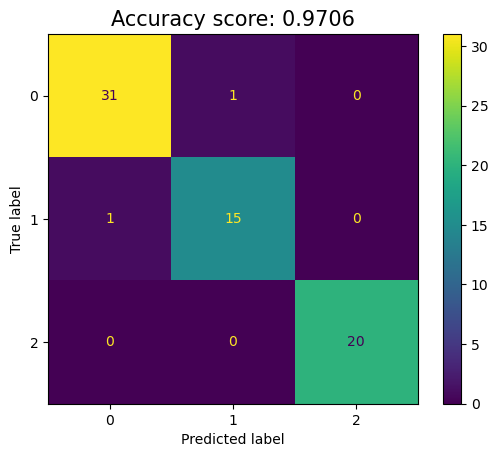

In [42]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.title(f"Accuracy score: {accuracy.round(4)}", size = 15)
plt.show()

The confusion matrix above displays an almost perfect model. However, there are errors when displaying The Adelie and Chinstrap species. These errors contribute to the accuracy score of 0.9706. 

## Visualization - Plotting decision regions

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


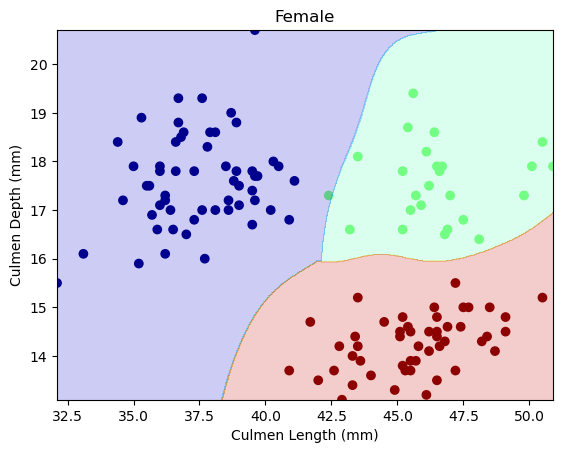

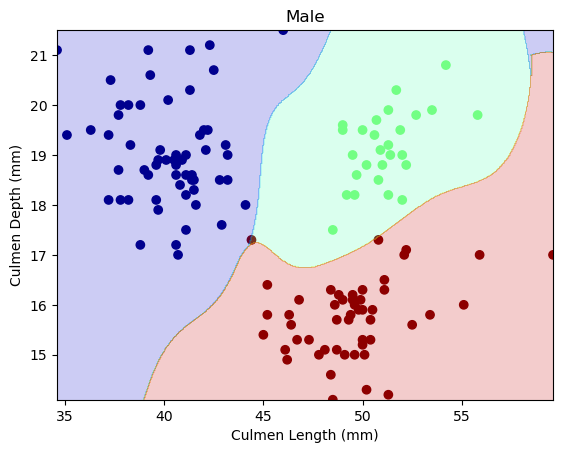

In [43]:
SVM=svm.SVC(gamma = 0.20)
plot_region(SVM,x_train,y_train)

### Discussion of mistakes

The performance of the Support Vector Machine is almost perfect. The model may fail in some cases because the way it is fit on the data differs from other models. It does not directly provide probability estimates, which is why there may be some distinctions in the decision regions. As shown above, in the Male plot, the species indicated with blue is displayed with two regions. However, this model is more comprehensive than the other two models because it displays regions closer to the actual statistical data and are not linearly restrained. 


# Discussion

Our models were effective in evaluating the our data set. After modeling the data, we would recommend using Random Forest modeling in evaluating Culmen Depth, Culmen Length, and Sex. This is because Random Forest Model grows multiple decision trees and using these groupings to determine the most accurate prediction for the data. This is better than the other two models because they use linear regression. 

If more data was available, the accuracy of the model could be improved because we would have more data to train. In addition, with a larger data set, outliers become more visible which causes the trends and distributions of the data to be more pronounced. If we had more data, variance is increased while bias is decreased. If different data was available, the model could be improved by using the different data to make new combinations, and if the new combinations are able to produce a higher CV score, accuracy is improved. Since our data did have an outlier, this may have affected the way our models fit the data, and therefore, may have affected our accuracy scores.